In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

import os

In [36]:
! ls ../../Data/boost_labelled

news1.csv news2.csv news3.csv news4.csv news5.csv


In [37]:
BASIC_PATH = '../../Data/boost_labelled'

In [38]:
filenames = []

In [39]:
for filename in os.listdir(BASIC_PATH):
    if not filename.startswith('.'):
        filenames.append(f'{BASIC_PATH}/{filename}')
filenames

['../../Data/boost_labelled/news3.csv',
 '../../Data/boost_labelled/news2.csv',
 '../../Data/boost_labelled/news1.csv',
 '../../Data/boost_labelled/news5.csv',
 '../../Data/boost_labelled/news4.csv']

In [40]:
data = pd.DataFrame()
for filename in filenames:
    print('Reading', filename)
    df = pd.read_csv(filename, sep=';', header=0)
    data = pd.concat([data, df]).reset_index(drop=True)
data

Reading ../../Data/boost_labelled/news3.csv
Reading ../../Data/boost_labelled/news2.csv
Reading ../../Data/boost_labelled/news1.csv
Reading ../../Data/boost_labelled/news5.csv
Reading ../../Data/boost_labelled/news4.csv


,source,title,published_at,currencies,News value,full_news_url,description
0,Executive Chairman,RT @justmoon: This is a post I've been wanting...,2022-12-07T19:13:11Z,XRP,0.0,https://cryptopanic.com/news/17094657/RT-justm...,NaN
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre..."
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...
...,...,...,...,...,...,...,...
873,The Daily Hodl,DeFiChain’s Much Anticipated ‘Grand Central’ H...,2022-12-08T17:42:49Z,BTC,1.0,https://cryptopanic.com/news/17103767/DeFiChai...,"<p>December 8, 2022 – Singapore, Singapore DeF..."
874,The Employment Commons Work Token Twitter,RT @NEAR__SF: Thank you to our community partn...,2022-12-08T17:41:19Z,"WORK,NEAR",0.0,https://cryptopanic.com/news/17110649/RT-NEAR_...,NaN
875,Blockworks,Ex-Blockparty CTO Arrested for Stealing Compan...,2022-12-08T17:26:18Z,BTC,0.0,https://cryptopanic.com/news/17103734/Ex-Block...,<p>Rikesh Thapa was arrested in California for...
876,NewsBTC,Bitcoin Price Prediction: What Elliott Wave Th...,2022-12-08T17:25:56Z,"BTC,FLOW",0.0,https://cryptopanic.com/news/17103713/Bitcoin-...,<p>Any Bitcoin price prediction is just a gues...


/Users/stepanwork/opt/anaconda3/envs/mlpy38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='News value', ylabel='count'>

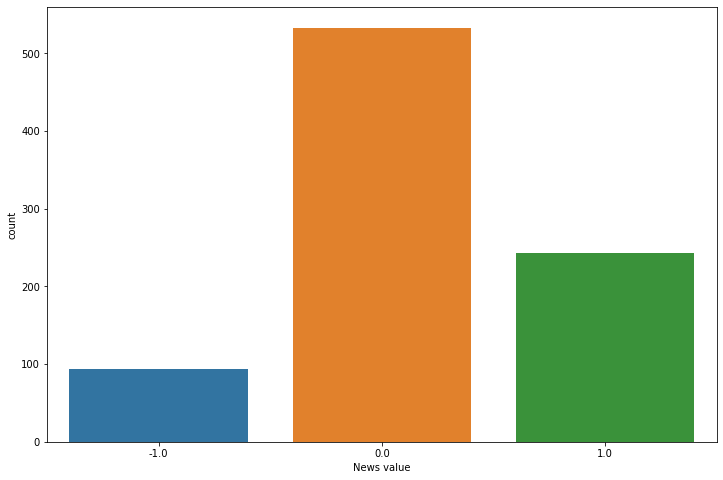

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(data['News value'])

In [54]:
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

In [70]:
def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   source         857 non-null    object 
 1   title          868 non-null    object 
 2   published_at   857 non-null    object 
 3   currencies     827 non-null    object 
 4   News value     870 non-null    float64
 5   full_news_url  878 non-null    object 
 6   description    717 non-null    object 
 7   combined       699 non-null    object 
dtypes: float64(1), object(7)
memory usage: 55.0+ KB


In [67]:
data['combined'] = 'Source: ' + data['source'] + ' Title: ' + data['title'] + ' Description: ' + data['description']
data['combined']

0                                                    NaN
1      Source: CoinTelegraph Title: Bitcoin options d...
2      Source: The Daily Hodl Title: Crypto Exchange ...
3      Source: The Daily Hodl Title: BitKeep Wallet G...
4      Source: Bitcoin Magazine Title: Kazakhstan Pre...
                             ...                        
873    Source: The Daily Hodl Title: DeFiChain’s Much...
874                                                  NaN
875    Source: Blockworks Title: Ex-Blockparty CTO Ar...
876    Source: NewsBTC Title: Bitcoin Price Predictio...
877    Source: The Block Title: Ethereum developers t...
Name: combined, Length: 878, dtype: object

In [68]:
data = data[~data['combined'].isna()]
data['combined']

1      Source: CoinTelegraph Title: Bitcoin options d...
2      Source: The Daily Hodl Title: Crypto Exchange ...
3      Source: The Daily Hodl Title: BitKeep Wallet G...
4      Source: Bitcoin Magazine Title: Kazakhstan Pre...
5      Source: CoinTelegraph Title: The blockchain tr...
                             ...                        
872    Source: Cryptonews Title: Ethereum Price Predi...
873    Source: The Daily Hodl Title: DeFiChain’s Much...
875    Source: Blockworks Title: Ex-Blockparty CTO Ar...
876    Source: NewsBTC Title: Bitcoin Price Predictio...
877    Source: The Block Title: Ethereum developers t...
Name: combined, Length: 699, dtype: object

In [71]:
data['combined'] = data['combined'].apply(cleanhtml)

/var/folders/l4/kkbfk_xs52n01x_2cs6bv8g40000gp/T/ipykernel_12028/2628942119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined'] = data['combined'].apply(cleanhtml)


In [85]:
data = data.drop_duplicates(['combined']).reset_index(drop=True)
data

,source,title,published_at,currencies,News value,full_news_url,description,combined,source_one_hot,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...,Source: CoinTelegraph Title: Bitcoin options d...,0,growth
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...,Source: The Daily Hodl Title: Crypto Exchange ...,1,no effect
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre...",Source: The Daily Hodl Title: BitKeep Wallet G...,1,no effect
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,2,no effect
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,<p>Blockchain trilemma is arguably the hardest...,Source: CoinTelegraph Title: The blockchain tr...,0,no effect
...,...,...,...,...,...,...,...,...,...,...
684,Cryptonews,Ethereum Price Prediction with ETH Down 4.5% f...,2022-12-08T17:43:00Z,ETH,0.0,https://cryptopanic.com/news/17103762/Ethereum...,"<p>Ethereum (ETH), the cryptocurrency that pow...",Source: Cryptonews Title: Ethereum Price Predi...,7,no effect
685,The Daily Hodl,DeFiChain’s Much Anticipated ‘Grand Central’ H...,2022-12-08T17:42:49Z,BTC,1.0,https://cryptopanic.com/news/17103767/DeFiChai...,"<p>December 8, 2022 – Singapore, Singapore DeF...",Source: The Daily Hodl Title: DeFiChain’s Much...,1,growth
686,Blockworks,Ex-Blockparty CTO Arrested for Stealing Compan...,2022-12-08T17:26:18Z,BTC,0.0,https://cryptopanic.com/news/17103734/Ex-Block...,<p>Rikesh Thapa was arrested in California for...,Source: Blockworks Title: Ex-Blockparty CTO Ar...,42,no effect
687,NewsBTC,Bitcoin Price Prediction: What Elliott Wave Th...,2022-12-08T17:25:56Z,"BTC,FLOW",0.0,https://cryptopanic.com/news/17103713/Bitcoin-...,<p>Any Bitcoin price prediction is just a gues...,Source: NewsBTC Title: Bitcoin Price Predictio...,17,no effect


In [86]:
sources = list(data['source'].unique())

In [87]:
data['source_one_hot'] = data['source'].apply(lambda x: sources.index(x))
data['source_one_hot']

0       0
1       1
2       1
3       2
4       0
       ..
684     7
685     1
686    42
687    17
688    11
Name: source_one_hot, Length: 689, dtype: int64

In [88]:
data[['source_one_hot', 'News value']].corr()

,source_one_hot,News value
source_one_hot,1.000000,-0.031553
News value,-0.031553,1.000000


In [89]:
data['label'] = data['News value'].apply(lambda x: 'growth' if x == 1 else 'decay' if x == -1 else 'no effect')

In [90]:
data_input = data[['combined', 'label']].copy()
data_input.columns = ['prompt', 'completion']
data_input['prompt'] = data_input['prompt'] + '\n\n###\n\n'
data_input['completion'] = ' ' + data_input['completion'] + ' END'
data_input

,prompt,completion
0,Source: CoinTelegraph Title: Bitcoin options d...,growth END
1,Source: The Daily Hodl Title: Crypto Exchange ...,no effect END
2,Source: The Daily Hodl Title: BitKeep Wallet G...,no effect END
3,Source: Bitcoin Magazine Title: Kazakhstan Pre...,no effect END
4,Source: CoinTelegraph Title: The blockchain tr...,no effect END
...,...,...
684,Source: Cryptonews Title: Ethereum Price Predi...,no effect END
685,Source: The Daily Hodl Title: DeFiChain’s Much...,growth END
686,Source: Blockworks Title: Ex-Blockparty CTO Ar...,no effect END
687,Source: NewsBTC Title: Bitcoin Price Predictio...,no effect END


In [91]:
data_input.to_json('./output/classification/source_title_description.jsonl', orient='records', lines=True)
data_input.to_csv('./output/classification/source_title_description.csv', index=False)